In [1]:
import fairbench as fb

In [2]:
y, yhat, sens = fb.bench.vision.utkface(classifier="flac", predict="probabilities")
flac_report = fb.biasreport(scores=yhat, labels=y, sensitive=fb.Fork(fb.categories@sens))
y, yhat, sens = fb.bench.vision.utkface(classifier="badd", predict="probabilities")
badd_report = fb.biasreport(scores=yhat, labels=y, sensitive=fb.Fork(fb.categories@sens))

use existing biased_utk_face from data/pickles/biased_utk_face-target_gender-bias_race-0.9


/home/maniospas/Documents/FairBench/py312/lib/python3.12/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 21.40it/s]


use existing biased_utk_face from data/pickles/biased_utk_face-target_gender-bias_race-0.9


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 22.82it/s]


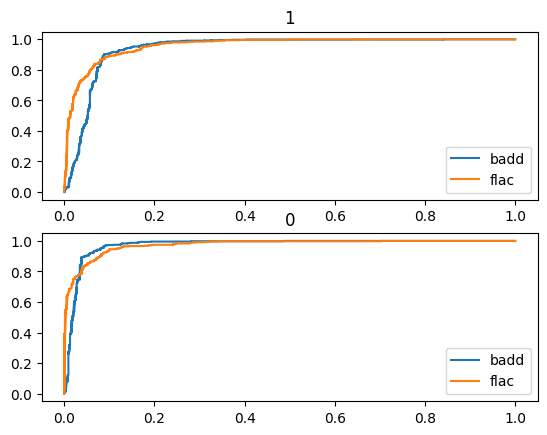

In [3]:
report = fb.Fork(badd=badd_report, flac=flac_report)
fb.visualize(report.maxrdiff.auc.explain.explain.curve)

In [ ]:
y, yhat, sens = fb.bench.vision.celeba(classifier="flac", predict="predict", device="cpu")
flac_report = fb.biasreport(predictions=yhat, labels=y, sensitive=fb.Fork(fb.categories@sens))
y, yhat, sens = fb.bench.vision.celeba(classifier="badd", predict="predict", device="cpu")
badd_report = fb.biasreport(predictions=yhat, labels=y, sensitive=fb.Fork(fb.categories@sens))
y, yhat, sens = fb.bench.vision.celeba(classifier="mavias", predict="predict", device="cpu")
mavias_report = fb.biasreport(predictions=yhat, labels=y, sensitive=fb.Fork(fb.categories@sens))

In [ ]:
report = fb.Fork(badd=badd_report, flac=flac_report, mavias=mavias_report)
fb.visualize(report.maxrdiff)

In [4]:
y, yhat, sens = fb.bench.vision.waterbirds(classifier="badd", predict="predict")
badd_report = fb.biasreport(predictions=yhat, labels=y, sensitive=fb.Fork(fb.categories@sens))
y, yhat, sens = fb.bench.vision.waterbirds(classifier="mavias", predict="predict")
mavias_report = fb.biasreport(predictions=yhat, labels=y, sensitive=fb.Fork(fb.categories@sens))

---------- indexing test data ----------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [02:54<00:00,  1.96s/it]


---------- indexing test data ----------


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 359.04it/s]


RuntimeError: Error(s) in loading state_dict for ResNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([2, 2048]) from checkpoint, the shape in current model is torch.Size([1000, 2048]).
	size mismatch for fc.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([1000]).

In [3]:
report = fb.Fork(mavias=mavias_report, flac=badd_report)
fb.visualize(report.maxrdiff)

NameError: name 'mavias_report' is not defined